![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).
5. Change the type of `effective_to_date` column to DateTime format.
6. Check `NaN` values per column.
7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
8. Drop any ID column.
9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df. 
11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
13. According to the previous histogram plots, do you think that you will have to apply any transformation?
14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [46]:
# Import libraries
import numpy as np
import pandas as pd

import my_functions

In [47]:
# Load data
customer_df = pd.read_csv('./files_for_lab/customer_value_analysis.csv')

# Initial data overview
display(customer_df.info())
display(customer_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:
# Format column names
customer_df = my_functions.format_column_names(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [49]:
# Change effective_to_date data type to DateTime
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')
display(customer_df.head())
display(customer_df.dtypes)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [50]:
# Check null values
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [51]:
# Create function to split DataFrame into numerical and categorical dataframes
def split_numerical_categorical_columns(df: pd.DataFrame):
    '''

    This function takes a DataFrame and splits it into two:
    a categorical and a numerical DataFrame.

    Input:
        df: input pandas DataFrame

    Output:
        tuple: a tuple containing two dataframes -> (df_num , df_cat)
    
    '''
    df1 = df.copy()

    numericals_df = df1.select_dtypes(include='number')
    categoricals_df = df1.select_dtypes(include='object')

    return (numericals_df, categoricals_df)

In [52]:
# Split customer_df into numerical and categorical dataframes
numericals_df, categoricals_df = split_numerical_categorical_columns(customer_df)

In [53]:
# Drop customer - ID column
categoricals_df.drop('customer', axis=1, inplace=True)

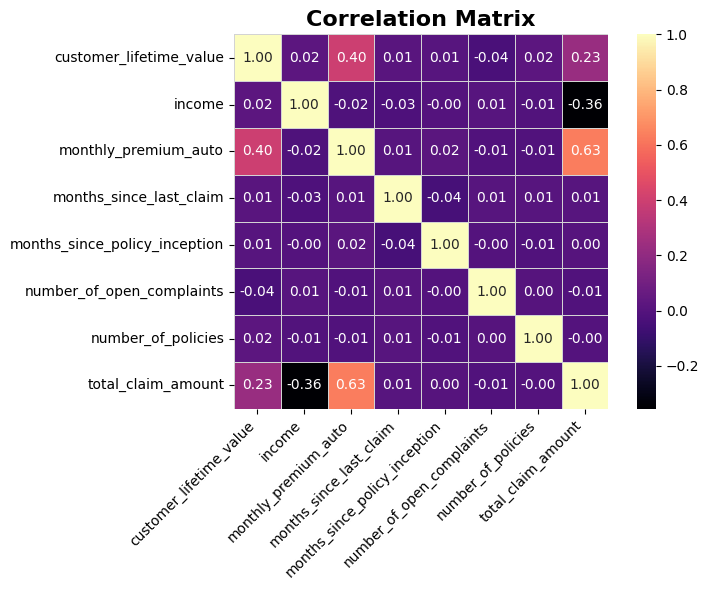

In [54]:
# Plot correlation matrix
my_functions.plot_correlation_matrix(numericals_df)

+ The pair of numerical columns that have the highest correlation are: total_claim_amount and monthly_premium_auto. This makes sense, since the higher the monthly rate, the higher amount they are going to have to pay.

In [55]:
def split_numericals_into_continous_and_discrete(df: pd.DataFrame, threshold: int=36):
    '''

    This function takes a pandas DataFrame as an input and returns 
    two pandas DataFrames: the first containing numerical continuous columns 
    and the second containing numerical discrete columns of the input dataframe.

    Input:
        df: input pandas DataFrame
        

    Output:
        tuple: two pandas DataFrames (df_cont, df_discrete)
        
    '''
    df1 = df.copy()

    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for col in df1.columns:
        if df1[col].value_counts().shape[0] > threshold:
            continuous_df[col] = df1[col]
        else:
            discrete_df[col] = df1[col]
    
    return (continuous_df, discrete_df)

In [56]:
# Split the numerical_df into continuous and discrete
continuous_df, discrete_df = split_numericals_into_continous_and_discrete(numericals_df)

In [57]:
def plot_discrete_in_barplots(df: pd.DataFrame):
    '''

    This function generates a barplot for discrete numerical columns

    Input:
        df: pandas df

    Output:
        barplot
        
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in df.columns:
        
        fig, ax = plt.subplots(figsize=(8, 8))

        df[col].value_counts()
        
        # Create the barplot
        sns.barplot(x=df[col].value_counts().keys(), y=df[col].value_counts().values, color='lightblue')
        
        # Add labels and title
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title(col)
        
        # Display the plot
        plt.show()


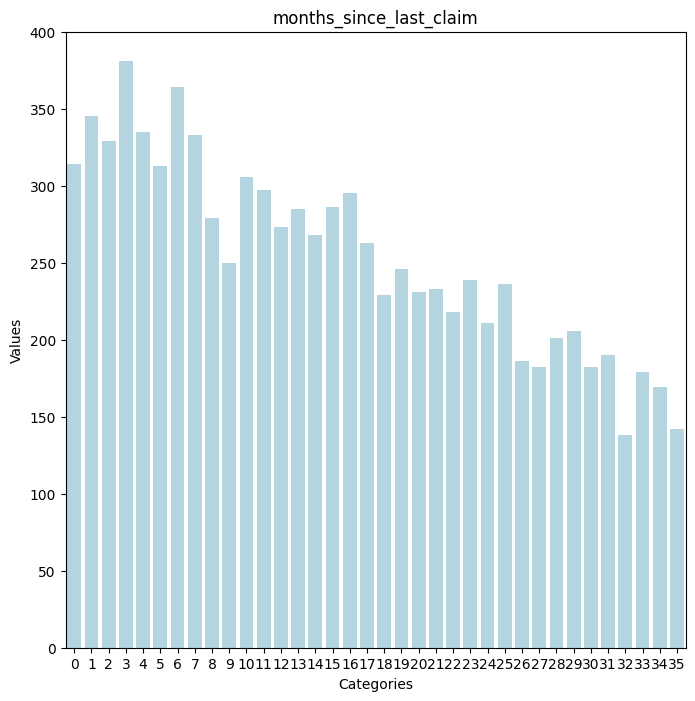

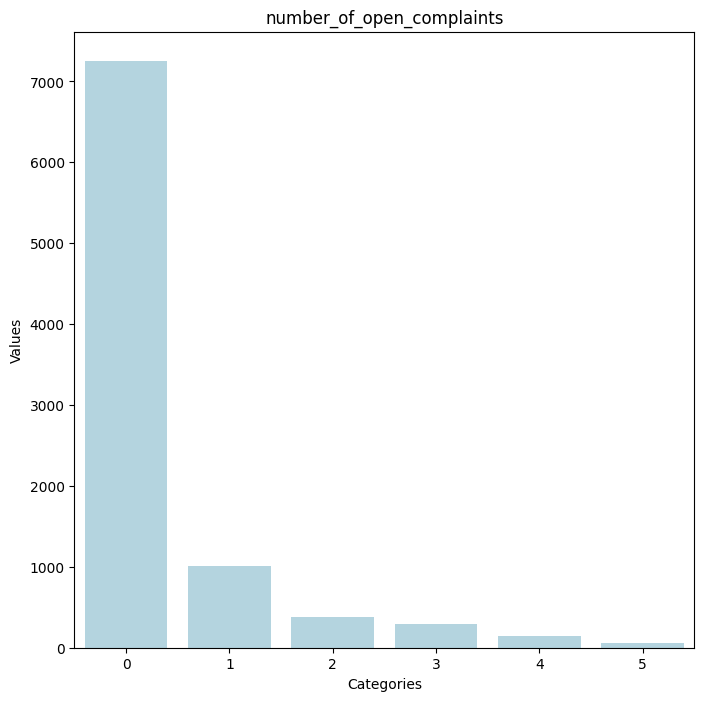

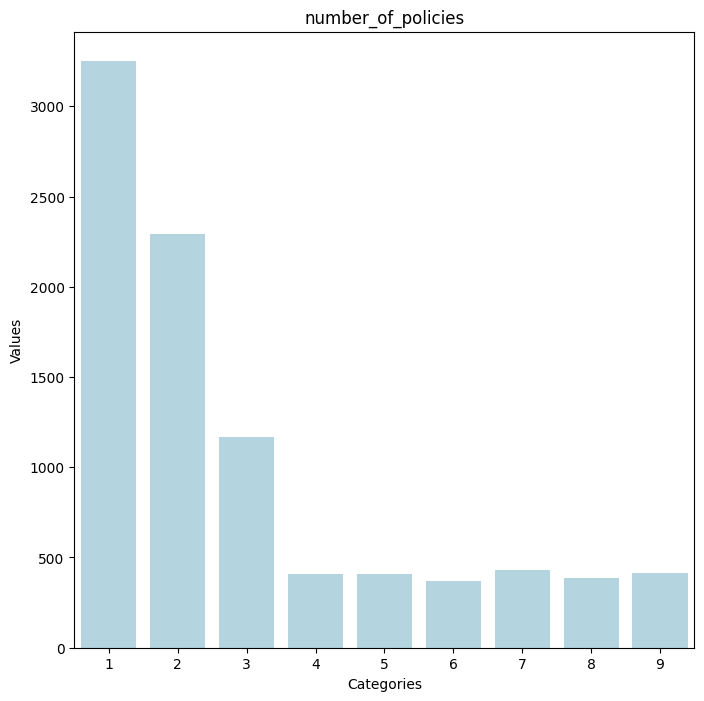

In [58]:
# Plot barplots for discrete columns
plot_discrete_in_barplots(discrete_df)

In [59]:
def plot_continuous_in_histograms(df: pd.DataFrame):
    '''

    This function generates a histogram for continuous numerical columns

    Input:
        df: pandas df

    Output:
        histograms
        
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in df.columns:
        
        fig, ax = plt.subplots(figsize=(8, 8))
        
        # Create the barplot
        sns.histplot(df, x = col, bins=20, ax=ax)
        
        # Add labels and title
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title(col)
        
        # Display the plot
        plt.show()


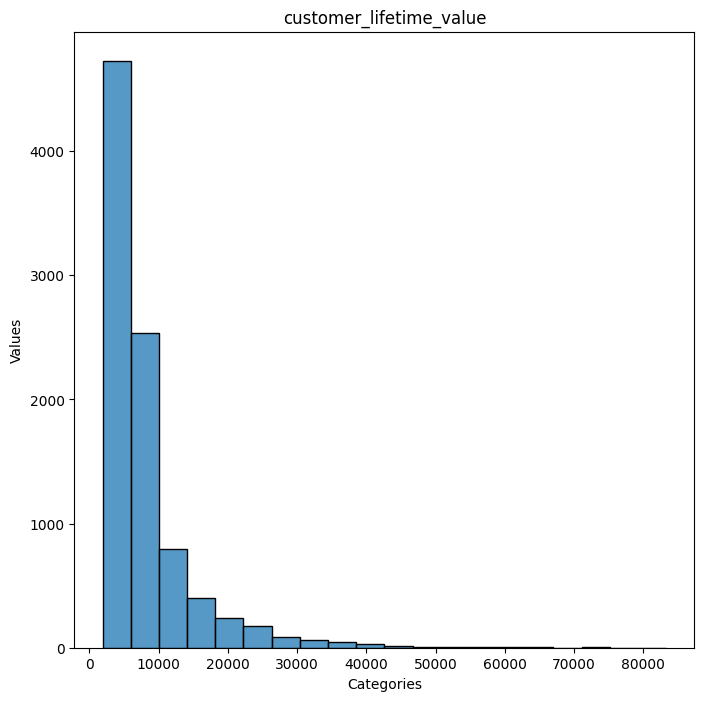

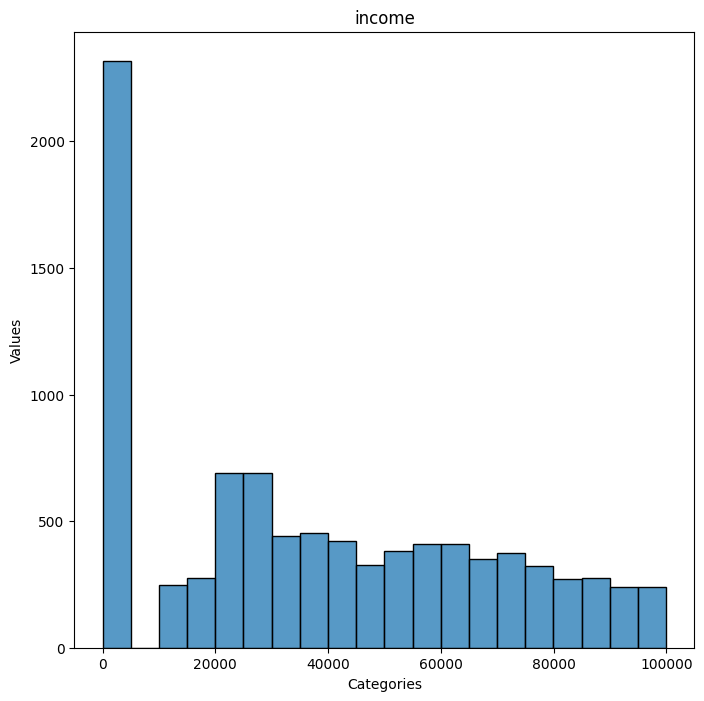

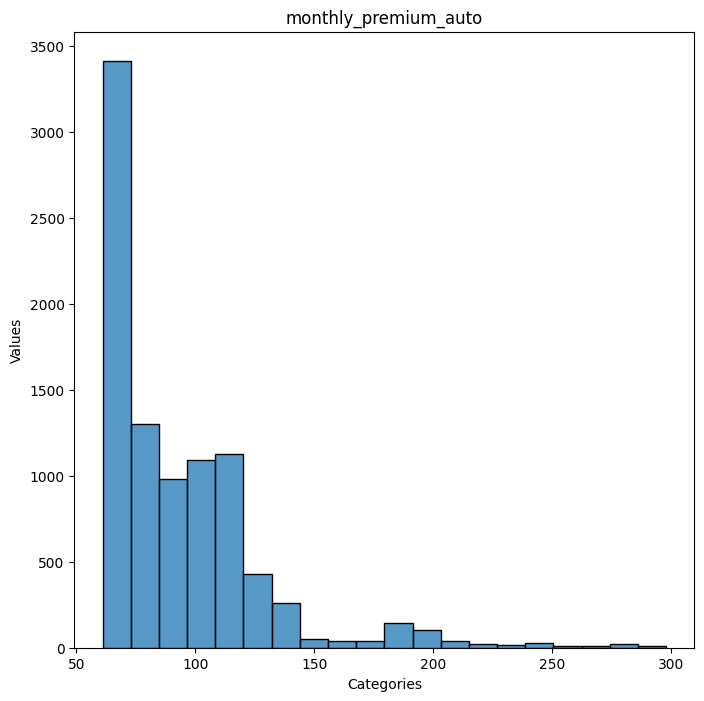

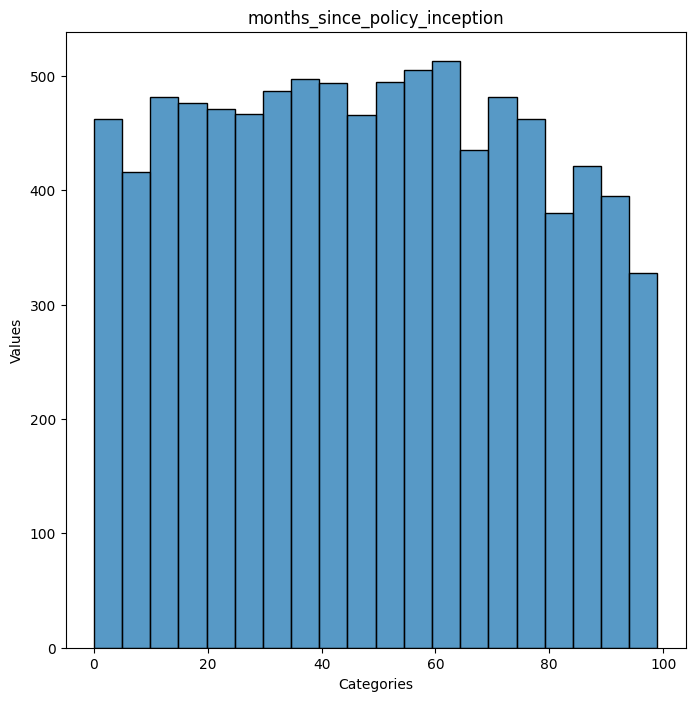

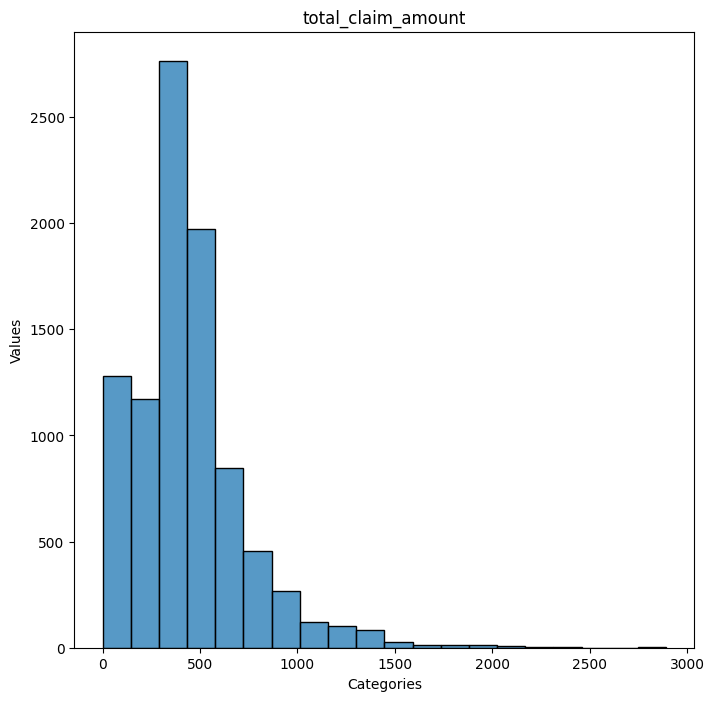

In [60]:
# Plot continuous in histogram
plot_continuous_in_histograms(continuous_df)

+ We will have to apply transformations: 'total_claim_amount', 'monthly_premium_auto' and 'customer_lifetime_value' are skewed, they show long tails on the right side of the plot

In [61]:
def plot_continuous_in_boxplot(df: pd.DataFrame):
    '''
    
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    for column in df.columns:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(data=df, x=column, ax=ax_box)
        sns.histplot(data=df, x=column, ax=ax_hist)
        plt.show()
    

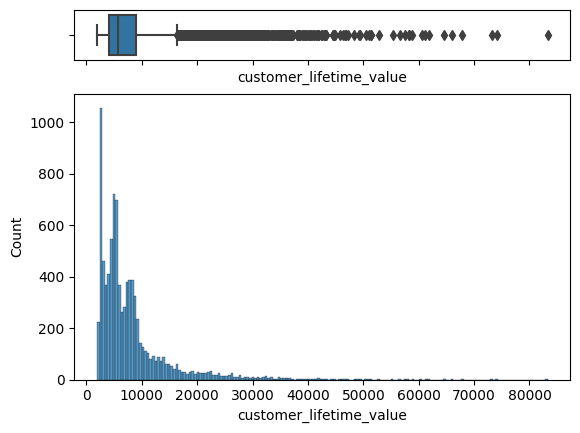

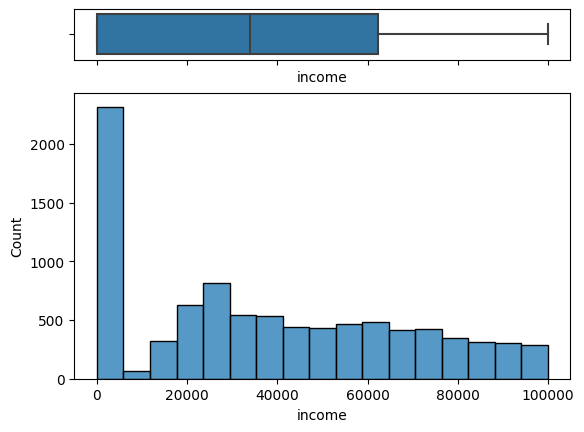

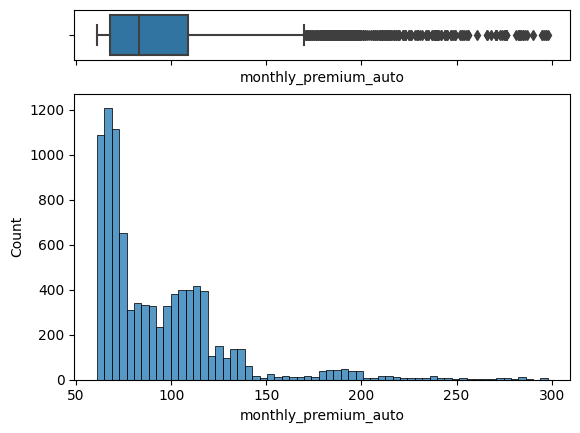

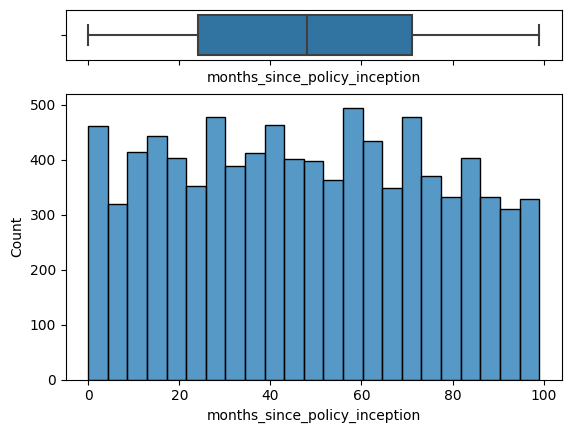

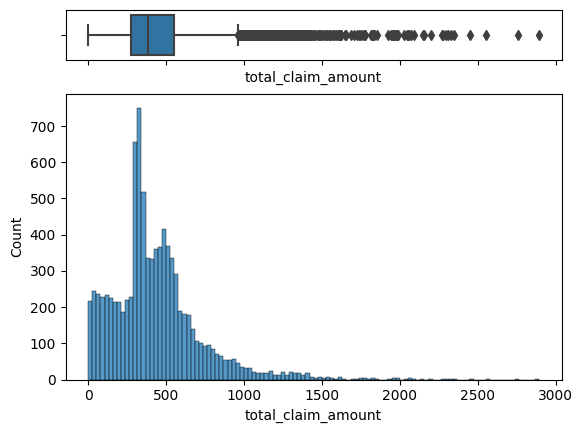

In [62]:
# Plot continuous variables in a histogram + boxplot
plot_continuous_in_boxplot(continuous_df)

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. 

### Special instructions

As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named `Lab Cleaning Categorical Data`. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.

### Instructions

1. Define a function that given a pandas DataFrame as input creates a **seaborn countplot** of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
2. `policy_type` and `policy` columns are redundant, and what's worse `policy` column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column `policy_type` and transform the column `policy` to three possible values: L1, L2, and L3 using a function.
3. Time dependency analysis. Use a seaborn line plot using the column `effective_to_date` to see if `total_claim_amount` is bigger at some specific dates. Use a figsize=(10,10)
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* `day` with the day number of `effective_to_date`
* `day_name` with the day NAME of `effective_to_date`
* `week` with the week of `effective_to_date`
* `month` with the month NAME of `effective_to_date`
* `total_claim_amount` with `total_claim_amount`
5. Compute the total `target` column aggregated `day_name` rounded to two decimals and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_days)`
6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_values)`
9. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
10. Plot the median "target" by day of the week name using a seaborn barplot
11. What can you conclude from this analysis?
12. Compute the total `target` column aggregated `month` rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
13. Can you do a monthly analysis given the output of the previous series? Why?
14. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
15. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
16. Concatenate the `continuous_cleaned_df`, `discrete_df`, `categorical_df`, and the relevant column of `time_df`. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using `pd.concat()`) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use `pd.dropna()` and `.reset_index()` to fix the final dataframe.
17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
18. Turn the `response` column values into (Yes=1/No=0).
19. Reduce the class imbalance in `education` by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
20. Reduce the class imbalance of the `employmentstatus` column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
21. Deal with column `Gender` turning the values into (1/0).
22. Now, deal with `vehicle_class` grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called `Luxury` leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
23. Now it's time to deal with the **categorical ordinal columns**, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
24. Encode the column `employmentstatus` as: "Employed" > "Inactive" > "Unemployed".
25. Encode the column `location_code` as: "Urban" > "Suburban" > "Rural".
26. Encode the column `vehicle_size` as: "Large" > "Medsize" > "Small".
27. Get a dataframe with the **categorical nominal columns**
28. Create a list of named `levels` which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

```python
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
```
28. Instantiate an [sklearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) with drop set to `first` and categories to `levels`

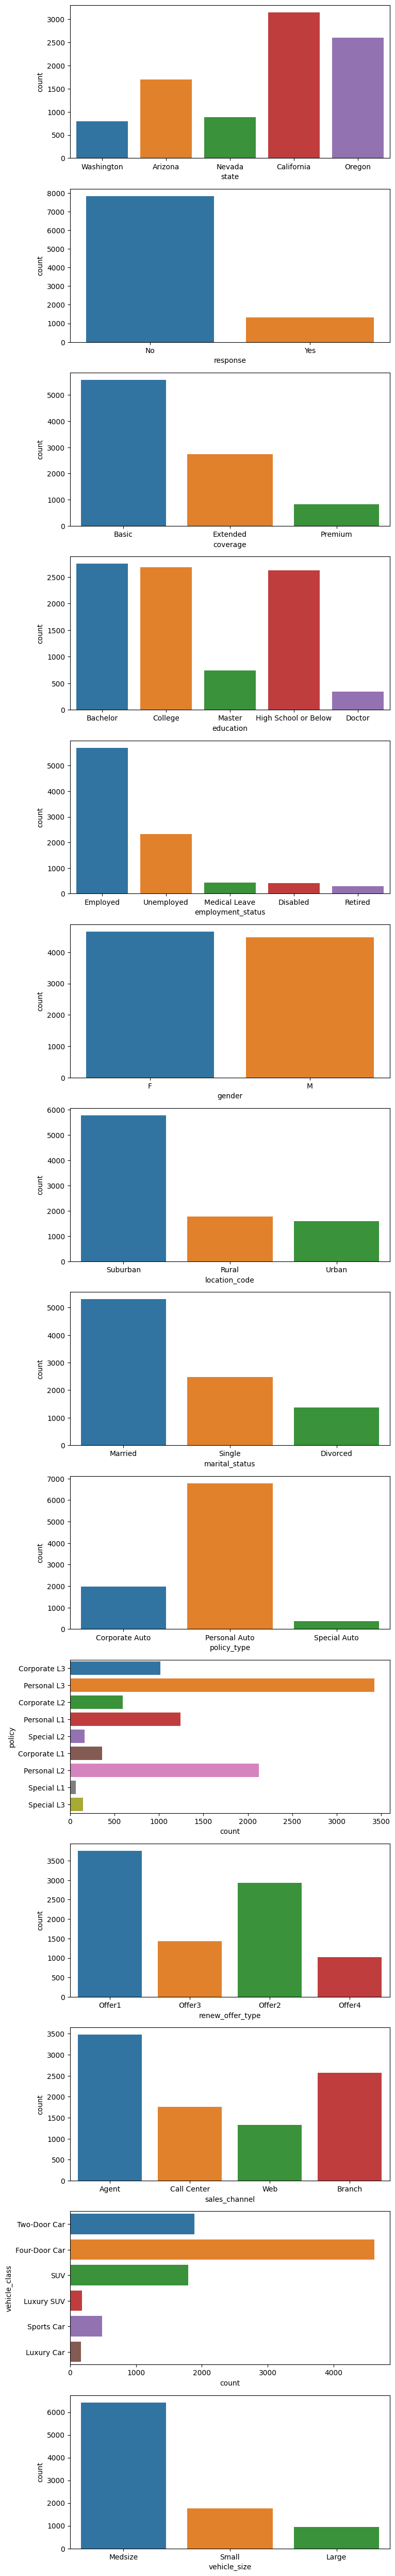

In [63]:
#1.

import matplotlib.pyplot as plt
import seaborn as sns

def plot_categoricals_in_countplot(df: pd.DataFrame):
    '''
    '''
    df1 = df.copy()

    fig, ax = plt.subplots(df1.shape[1], figsize=(8, 64))

    for col in df.columns:
        if df[col].value_counts().shape[0] > 5:
            sns.countplot(df, y=col, ax = ax[df.columns.get_loc(col)])
        else:
            sns.countplot(df, x=col, ax = ax[df.columns.get_loc(col)])

    plt.show()

plot_categoricals_in_countplot(categoricals_df)

In [64]:
#2.  

# Drop policy_type column
categoricals_df.drop('policy_type', axis=1, inplace=True)

# Convert policy
#categoricals_df['policy'] = [ x.split(" ")[1] for x in categoricals_df['policy'] ]
categoricals_df['policy'] = categoricals_df['policy'].apply(lambda x: x if " " not in x else x.split(" ")[1])

categoricals_df['policy'].value_counts()

policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

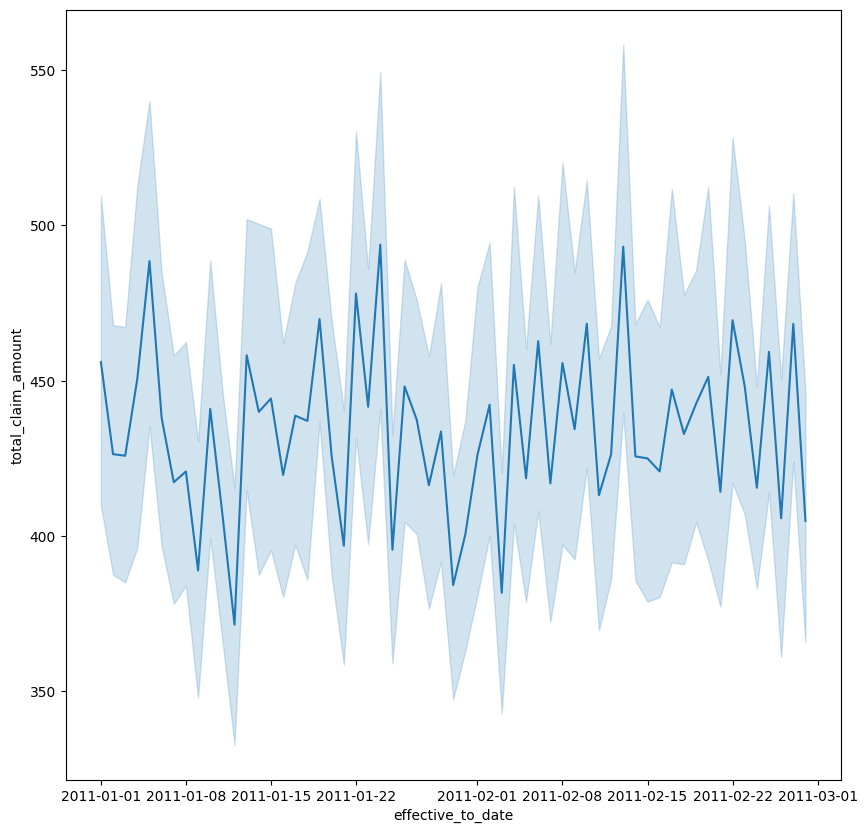

In [65]:
# 3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to 
# see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(customer_df, y='total_claim_amount', x='effective_to_date', ax=ax)

plt.show()

In [66]:
'''
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount
'''

time_df = pd.DataFrame()

time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.month
time_df['total_claim_amount'] = customer_df['total_claim_amount']
time_df['number_of_open_complaints'] =customer_df['number_of_open_complaints']

time_df

,day,day_name,week,month,total_claim_amount,number_of_open_complaints
0,24,Thursday,8,2,384.811147,0
1,31,Monday,5,1,1131.464935,0
2,19,Saturday,7,2,566.472247,0
3,20,Thursday,3,1,529.881344,0
4,3,Thursday,5,2,138.130879,0
...,...,...,...,...,...,...
9129,10,Thursday,6,2,198.234764,0
9130,12,Saturday,6,2,379.200000,0
9131,6,Sunday,5,2,790.784983,3
9132,3,Thursday,5,2,691.200000,0


In [67]:
# 5. Compute the total target column aggregated day_name rounded to two decimals and then 
# reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

list_of_correct_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df2 = time_df.groupby('day_name').agg({'total_claim_amount':'sum'}).round(2).reindex(index=list_of_correct_days)

df2

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


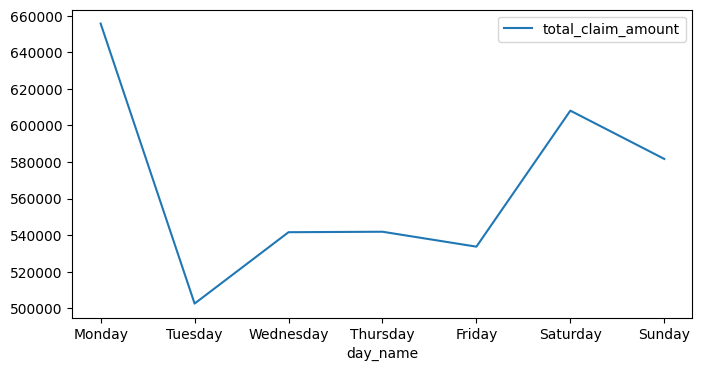

In [68]:
# 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(df2)

plt.show()

+ Days 0, 5 and 6 have a significantly higher value for total_claim_amount

In [69]:
# 7. Get the total number of claims by day of the week name and then reorder the index 
# of the resulting pandas series using .reindex(index=list_of_correct_values)

df3 = time_df.groupby('day_name').agg({'number_of_open_complaints':'sum'}).round(2).reindex(index=list_of_correct_days)

df3

,number_of_open_complaints
day_name,
Monday,652
Tuesday,456
Wednesday,422
Thursday,446
Friday,458
Saturday,530
Sunday,547


In [70]:
# 8. Get the median "target" by day of the week name and then sort the resulting values 
# in descending order using .sort_values()
df4 = time_df.groupby('day_name').agg({'total_claim_amount':'median'}
                                          ).round(2).reindex(index=list_of_correct_days
                                                            ).sort_values('total_claim_amount', ascending=False)

df4

,total_claim_amount
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


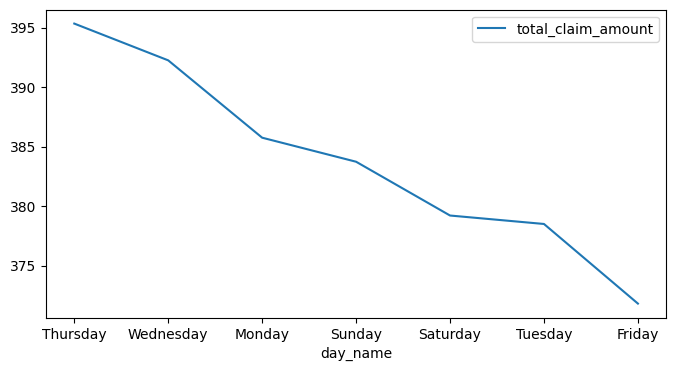

In [71]:
# 9. Plot the median "target" by day of the week name using a seaborn barplot

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(df4)

plt.show()

10. What can you conclude from this analysis?

+ There is no correlation between total_claim_amount and number_of_open_claims

In [72]:
# 11.Compute the total target column aggregated month rounded to two decimals and then 
# reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

df5 = time_df.groupby('month').agg({'total_claim_amount':'sum'}).round(2)

df5

,total_claim_amount
month,
1,2117142.86
2,1847824.19


12. Can you do a monthly analysis given the output of the previous series? Why?
 + No, its not possible to do an analysis because there are only two data points (two months)

In [73]:
# 13. Define a function to remove the outliers of a numerical continuous column depending 
# if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

def clean_outliers(df: pd.DataFrame, n_sd: int = 3):
    '''
    '''
    df1 = df.copy()

    for col in df1.columns:
        mean = df1[col].mean()
        sd = df1[col].std()
    
        df1.drop(df1[(df1[col] > mean + n_sd * sd) | (df1[col] < mean - n_sd * sd)].index, axis=0, inplace=True)
    
    return df1

In [74]:
# 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
continuous_cleaned_df = clean_outliers(continuous_df)

In [75]:
# 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. 
# After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual 
# dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. 
# Use pd.dropna() and .reset_index() to fix the final dataframe.

concat_df = pd.concat([continuous_cleaned_df, discrete_df, categoricals_df, time_df[['day', 'day_name', 'week', 'month']]], axis = 1)

concat_df = concat_df.dropna().reset_index(drop=True)

In [76]:
# 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

concat_df = concat_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'day', 'day_name', 'week', 'month','total_claim_amount']]

concat_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879


In [77]:
# 17. Turn the response column values into (Yes=1/No=0).

concat_df['response'] = concat_df['response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [78]:
# 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the 
# other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

concat_df['education'] = concat_df['education'].apply(lambda x: 'Graduate' if x in ['Master', 'Doctor'] else x)

In [79]:
# 19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] 
# into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class 
# imbalance at the price of losing a level of detail.

concat_df['employment_status'] = concat_df['employment_status'].apply(lambda x: 'Inactive' if x in ["Medical Leave", "Disabled", "Retired"] else x)

In [80]:
# 20. Deal with column Gender turning the values into (1/0)

concat_df['gender'] = concat_df['gender'].apply(lambda x: 0 if x == 'M' else 1)

In [81]:
# 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a 
# common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the 
# class imbalance at the price of losing a level of detail.

concat_df['vehicle_class'] = concat_df['vehicle_class'].apply(lambda x: 'Luxury' if x in ["Sports Car", "Luxury SUV", "Luxury Car"] else x)

In [82]:
# 22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique 
# value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

concat_df['coverage'].replace({'Premium':2,'Extended':1,'Basic':0}, inplace=True)

In [83]:
# 23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

concat_df['employment_status'].replace({'Employed':2,'Inactive':1,'Unemployed':0}, inplace=True)

In [84]:
# 24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

concat_df['location_code'].replace({'Urban':2,'Suburban':1,'Rural':0}, inplace=True)

In [85]:
# 25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

concat_df['vehicle_size'].replace({'Large':2,'Medsize':1,'Small':0}, inplace=True)

In [86]:
# 26. Get a dataframe with the categorical nominal columns
categorical_nominal_df = concat_df[['marital_status','policy','renew_offer_type','sales_channel','vehicle_class']]
categorical_nominal_df.dtypes

marital_status      object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
dtype: object

In [87]:
categorical_nominal_df

,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Married,L3,Offer1,Agent,Two-Door Car
1,Single,L3,Offer3,Agent,Four-Door Car
2,Married,L3,Offer1,Agent,Two-Door Car
3,Married,L2,Offer1,Call Center,SUV
4,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...
8570,Married,L1,Offer2,Web,Four-Door Car
8571,Divorced,L3,Offer1,Branch,Four-Door Car
8572,Single,L2,Offer1,Branch,Four-Door Car
8573,Married,L2,Offer3,Branch,Four-Door Car


In [88]:
# 27. Create a list of named levels which that has as many elements as categorical nominal columns. 
# Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
# levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

levels = []

for col in categorical_nominal_df.columns:
    lst = list(categorical_nominal_df[col].unique())
    levels.append(lst)

levels

[['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

In [89]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = levels, drop='first') # categories = [[valores_state] ,[valores_response] , , ] ,drop="first"

# Fit encoder
encoder.fit(categorical_nominal_df)

# Encode X_train_cat_nom and X_test_cat_nom with fitted encoder. Output is a np.SparseMatrix -> to_array() to transform to np.array
categorical_nominal_encoded = encoder.transform(categorical_nominal_df).toarray()

# Get feature names from encoder
column_names = encoder.get_feature_names_out()

# Convert np.array to DataFrame by adding columns
categorical_nominal_encoded_df = pd.DataFrame(categorical_nominal_encoded, 
                                          columns=column_names, 
                                          index=categorical_nominal_df.index) # <-IMPORTANT- keeps index order for concat
categorical_nominal_encoded_df

,marital_status_Single,marital_status_Divorced,policy_L2,policy_L1,renew_offer_type_Offer3,renew_offer_type_Offer2,renew_offer_type_Offer4,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8572,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8573,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Comparing regression models


For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

# Special instructions
As in this lab we will keep working of the same dataset of the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named Lab Comparing Regression Models. Then restart the Kernel and run all the previous cells. Finally, keep working of the same notebook according to the next instructions.

# Instructions

1. Define X and y
2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use `.toarray()` after `.transform()` to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using `encoder.get_feature_names_out()` and the same indexes of X_train_cat and X_test_cat
5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as:
X_train_num_transformed_df and X_test_num_transformed_df
6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new
7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as:
X_train_new_scaled_df and X_test_new_scaled_df
8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets
9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

|Error_metric| Value |
|------------|-------|
| MAE        | value |
| MSE        | value |
| RMSE       | value |
| MAPE       | value |
| R2         | value |

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets
11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.
12. Use the function to train the following models (with default settings):

*[LinearRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

*[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)

*[MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

15. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options? 

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import my_functions

In [91]:
# Create a copy of the clean df
clean_df = concat_df.copy()

# Define X cat and num, and target column (y)
X_cat_cols = ['state','response','coverage','education','employment_status','gender','location_code','marital_status','policy','vehicle_class','vehicle_size']
X_num_cols = ['customer_lifetime_value','income','monthly_premium_auto','number_of_policies','number_of_open_complaints']
y_col = 'total_claim_amount'

# Create X and y df
X = clean_df[X_cat_cols + X_num_cols]
y = clean_df[y_col]

In [92]:
# Split train/test data. Set test_size=0.30 and random_state=31
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [93]:
# Split data into categorical/numerical
X_train_cat = X_train[X_cat_cols]
X_train_num = X_train[X_num_cols]
X_test_cat = X_test[X_cat_cols]
X_test_num = X_test[X_num_cols]

In [94]:
encoder = OneHotEncoder() # categories = [[valores_state] ,[valores_response] , , ] ,drop="first"

# Fit encoder
encoder.fit(X_train_cat)

# Encode X_train_cat_nom and X_test_cat_nom with fitted encoder. Output is a np.SparseMatrix -> to_array() to transform to np.array
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

# Get feature names from encoder
column_names = encoder.get_feature_names_out()

# Convert np.array to DataFrame by adding columns
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, 
                                          columns=column_names, 
                                          index=X_train_cat.index) # <-IMPORTANT- keeps index order for concat
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, 
                                          columns=column_names, 
                                          index=X_test_cat.index) # <-IMPORTANT- keeps index order for concat

In [95]:
# Select PowerTransformer with yeo-johnson method
transformer = PowerTransformer()

# Fit transformer with TRAIN data
transformer.fit(X_train_num)

# Transform X_train_num & X_test_num with fitted transformer -> output is a np.array
X_train_num_transformed = transformer.transform(X_train_num)
X_test_num_transformed = transformer.transform(X_test_num)
#y_train_transformed = transformer.transform(y_train)

# Add columns to np.array to create a DataFrame
# IMPORTANT -> index = X_train/test_nom.index -> ensures we maintain index order & match when we concatenate
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

In [96]:
# Concatenate horizontally numerical, categorical nominal and categorical ordinal data frames

# X_train
X_train_transformed = pd.concat(
    [X_train_num_transformed_df,
     X_train_cat_encoded_df],
    axis=1)

# X_test
X_test_transformed = pd.concat(
    [X_test_num_transformed_df,
     X_test_cat_encoded_df],
    axis=1)

In [97]:
# Select MinMaxScaler to turn X_train_transformed & X_test_transformed to minimum = 0 and the maximum = 1
scaler = MinMaxScaler()

# Fit scaler with TRAIN data
scaler.fit(X_train_transformed)

# Scale X_train_transformed and X_test_transformed with fitted scaler. Output is a np.array.
X_train_transformed_scaled = scaler.transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

# Add columns to np.array to create a DataFrame
X_train_transformed_scaled_df = pd.DataFrame(X_train_transformed_scaled, 
                                                 columns=X_train_transformed.columns, 
                                                 index=X_train_transformed.index)

X_test_transformed_scaled_df = pd.DataFrame(X_test_transformed_scaled, 
                                              columns=X_test_transformed.columns,
                                               index=X_test_transformed.index)

In [98]:
# Select Linear Regression model
linear_model = LinearRegression()

# Fit the model with the train data -> X_train_transformed_scaled_df
linear_model.fit(X_train_transformed_scaled_df, y_train)

# Make predictions with .predict()
y_train_pred = linear_model.predict(X_train_transformed_scaled_df)
y_test_pred  = linear_model.predict(X_test_transformed_scaled_df)

In [99]:
# Create a function that given a model prediction and real values returns an error metrics report
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def create_error_metrics_report(y_real_train: pd.DataFrame, y_pred_train: pd.DataFrame,
                                y_real_test: pd.DataFrame, y_pred_test: pd.DataFrame) -> pd.DataFrame:
    '''
    '''

    # Mean absolute error
    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared = False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared = False)

    # Mean absolute percentage error
    MAPE_train = mean_absolute_percentage_error(y_real_train, y_pred_train)
    MAPE_test  = mean_absolute_percentage_error(y_real_test, y_pred_test)

    # R2 error
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE','MSE','RMSE','MAPE','R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, MAPE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [100]:
# Create & display error metrics DataFrame
create_error_metrics_report(y_train, y_train_pred, y_test, y_test_pred)

,Metric,Train,Test
0,MAE,81.36,82.77
1,MSE,11420.07,12017.04
2,RMSE,106.86,109.62
3,MAPE,0.80,0.99
4,R2,0.77,0.76


In [101]:
# Define a function that takes as an input: list of models, X_train and y_train to train several model 
# (with default values) so we can train a lot of them without repeating code. 
# The function must return the list of trained models.




def train_models(models: list, X_train: pd.DataFrame, y_train: pd.DataFrame) -> list:
    '''
    '''

    for model in models:
        model.fit(X_train, y_train)
        
    return models

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

linear_model = LinearRegression()
kn_model = KNeighborsRegressor()
mlpr_model = MLPRegressor()

trained_models = train_models([linear_model, kn_model, mlpr_model], X_train_transformed_scaled_df, y_train)

for model in trained_models:
    y_train_pred = model.predict(X_train_transformed_scaled_df)
    y_test_pred  = model.predict(X_test_transformed_scaled_df)
    print("Model",model)
    display(create_error_metrics_report(y_train, y_train_pred, y_test, y_test_pred))


Model LinearRegression()


/Users/nmirabets/Documents/Ironhack_labs/ironhack/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Metric,Train,Test
0,MAE,81.36,82.77
1,MSE,11420.07,12017.04
2,RMSE,106.86,109.62
3,MAPE,0.80,0.99
4,R2,0.77,0.76


Model KNeighborsRegressor()


,Metric,Train,Test
0,MAE,67.50,83.38
1,MSE,9235.67,14323.37
2,RMSE,96.10,119.68
3,MAPE,0.84,0.89
4,R2,0.81,0.71


Model MLPRegressor()


,Metric,Train,Test
0,MAE,77.41,78.99
1,MSE,10538.39,11209.11
2,RMSE,102.66,105.87
3,MAPE,0.75,0.89
4,R2,0.79,0.77


+ KNeighbours model performs best with **R2 = 0.81**